In [22]:
import matplotlib.pyplot as plt
import numpy as np

def stepper_torque_vs_speed(torque_input, max_holding_torque, max_speed_rpm):
    # Assuming linear decrease of torque with increase in speed
    if torque_input <= max_holding_torque:
        speed_rps = (max_speed_rpm / 60) * (1 - torque_input / max_holding_torque)  # Convert RPM to RPS
    else:
        speed_rps = 0
    return speed_rps

def stepper_current_vs_torque(torque_input, max_holding_torque, max_current):
    # Linear relationship between current and torque
    if torque_input <= max_holding_torque:
        current = max_current * (torque_input / max_holding_torque)
    else:
        current = max_current
    return current

# Parameters for the NEMA 14 stepper motor
max_holding_torque_in_oz = 7.5  # in-oz
max_speed_rpm = 3300  # RPM
max_current = 0.45  # A

# Convert torque from in-oz to kgf·cm (1 in-oz = 0.0720078 kgf·cm)
max_holding_torque_kgf_cm = max_holding_torque_in_oz * 0.0720078

# Example usage
torque_value_kgf_cm = 0.5546323287727919

speed_rps = stepper_torque_vs_speed(torque_value_kgf_cm, max_holding_torque_kgf_cm, max_speed_rpm)
current = stepper_current_vs_torque(torque_value_kgf_cm, max_holding_torque_kgf_cm, max_current)

print(f"Speed for {torque_value_kgf_cm:.2f} kgf·cm torque: {speed_rps:.2f} rotations/second")
print(f"Current for {torque_value_kgf_cm:.2f} kgf·cm torque: {current:.2f} A")


Speed for 0.55 kgf·cm torque: 0.00 rotations/second
Current for 0.55 kgf·cm torque: 0.45 A


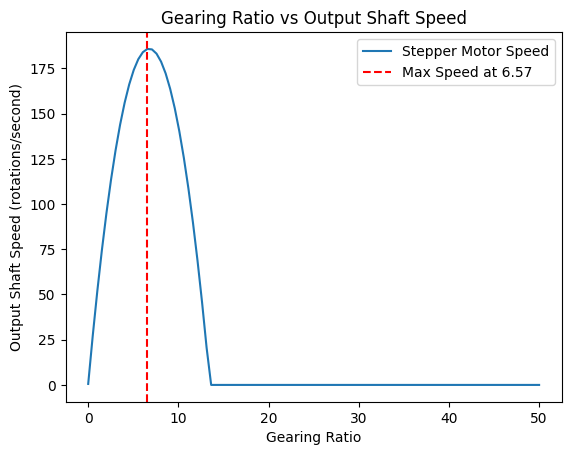

Maximum speed: 185.79192064635774 rotations/second, Gearing Ratio: 6.57, Effective Torque on Motor: 0.26 kgf·cm


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def stepper_torque_vs_speed(torque_input, max_holding_torque, max_speed_rpm):
    # Assuming linear decrease of torque with increase in speed
    if torque_input <= max_holding_torque:
        speed_rps = (max_speed_rpm / 60) * (1 - torque_input / max_holding_torque)  # Convert RPM to RPS
    else:
        speed_rps = 0
    return speed_rps

def plot_gearing_ratio_vs_speed(torque_value, max_holding_torque, max_speed_rpm):
    gearing_ratios = np.linspace(0.01, 50, 100)  # Gearing ratios from near 0 to 50
    speeds_rps = []

    for gearing_factor in gearing_ratios:
        # Effective torque increases with gearing
        effective_torque = torque_value * gearing_factor

        # Calculate speed at this gearing ratio
        speed = stepper_torque_vs_speed(effective_torque, max_holding_torque, max_speed_rpm)

        # Adjusted for output shaft speed
        speed_rps = speed * gearing_factor

        speeds_rps.append(speed_rps)

    # Find the maxima and its corresponding gearing ratio
    max_speed = max(speeds_rps)
    max_ratio = gearing_ratios[speeds_rps.index(max_speed)]

    # Plotting
    plt.plot(gearing_ratios, speeds_rps, label='Stepper Motor Speed')
    
    # Draw dashed vertical line at maxima
    plt.axvline(x=max_ratio, color='red', linestyle='--', label=f'Max Speed at {max_ratio:.2f}')

    plt.xlabel('Gearing Ratio')
    plt.ylabel('Output Shaft Speed (rotations/second)')
    plt.title('Gearing Ratio vs Output Shaft Speed')
    plt.legend()
    plt.show()

    return max_speed, max_ratio

# Parameters for the NEMA 14 stepper motor
max_holding_torque_in_oz = 7.5  # in-oz
max_speed_rpm = 3300  # RPM

# Convert torque from in-oz to kgf·cm (1 in-oz = 0.0720078 kgf·cm)
max_holding_torque_kgf_cm = max_holding_torque_in_oz * 0.0720078

# Example usage
torque_value_in_oz = 0.5546323287727919  # Example torque value in in-oz
torque_value_kgf_cm = torque_value_in_oz * 0.0720078  # Convert to kgf·cm

max_speed, max_ratio = plot_gearing_ratio_vs_speed(torque_value_kgf_cm, max_holding_torque_kgf_cm, max_speed_rpm)

# Calculate the effective torque on the motor at the maximum
effective_torque = torque_value_kgf_cm * max_ratio

# Print the results with the effective torque
print(f"Maximum speed: {max_speed} rotations/second, Gearing Ratio: {max_ratio:.2f}, Effective Torque on Motor: {effective_torque:.2f} kgf·cm")


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def torque_vs_speed(torque_input): 
    # Converted parameters for the stepper motor
    stall_torque = 7.5 * 0.00706155  # in.-oz to kgf·cm
    no_load_speed = 3300 * 0.10472   # RPM to radians per second

    # Calculate speed for input torque
    speed = no_load_speed * (1 - torque_input / stall_torque) if torque_input <= stall_torque else 0
    return speed

def current_vs_torque(torque_input):
    # Parameters for stepper motor
    running_current = 0.45   # A (assuming constant current for stepper motor)
    stall_torque = 7.5 * 0.00706155 # in.-oz to kgf·cm

    # Calculate current for input torque
    current = running_current if torque_input <= stall_torque else running_current
    return current

# Example usage
torque_value = 0.5546323287727919  #  torque value in kg·cm
speed = torque_vs_speed(torque_value)

# Convert from radians/second to rotations per second
speed_rps = speed / (2 * np.pi)

print(f"Speed for {torque_value} kgf·cm: {speed_rps} rotations/second")

# Apply gear ratio (e.g., 9:1)
gearing_factor = 1 / 100
geared_torque_value = torque_value * gearing_factor
geared_speed = torque_vs_speed(geared_torque_value)
geared_speed_rps = geared_speed / (2 * np.pi)  # Corrected to not double the speed

print(f"Geared speed for {geared_torque_value} kgf·cm (with {gearing_factor}:1 ratio): {geared_speed_rps} rotations/second")

# Current calculation
current = current_vs_torque(torque_value)
print(f"Current for {torque_value} kgf·cm: {current} A")


Speed for 0.5546323287727919 kgf·cm: 0.0 rotations/second
Geared speed for 0.005546323287727919 kgf·cm (with 0.01:1 ratio): 49.2403262256967 rotations/second
Current for 0.5546323287727919 kgf·cm: 0.45 A
